In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
import os

sys.path.insert(0, os.path.abspath('../../../'))
from kaggle_utils import download_and_setup_dataset


In [3]:
dataset_name = "nelgiriyewithana/apple-quality"
dataset_path = download_and_setup_dataset(dataset_name)
dataset_path = dataset_path[0] # single data file

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.graphics.gofplots import qqplot

In [5]:
data = pd.read_csv(dataset_path)
data.head()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good


In [6]:
## Remove irrelevant columns
data.drop(columns=['A_id'], inplace=True)
data.head()

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good


In [7]:
data[data.isna().any(axis=1)]

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
4000,NaN,NaN,NaN,NaN,NaN,NaN,Created_by_Nidula_Elgiriyewithana,NaN


In [8]:
data.dropna(inplace=True)

In [9]:
data.dtypes

Size           float64
Weight         float64
Sweetness      float64
Crunchiness    float64
Juiciness      float64
Ripeness       float64
Acidity         object
Quality         object
dtype: object

In [10]:
data['Acidity'] = data['Acidity'].astype('float64')

In [11]:
numerical_columns = data.columns[data.dtypes != 'object']
numerical_columns

Index(['Size', 'Weight', 'Sweetness', 'Crunchiness', 'Juiciness', 'Ripeness',
       'Acidity'],
      dtype='object')

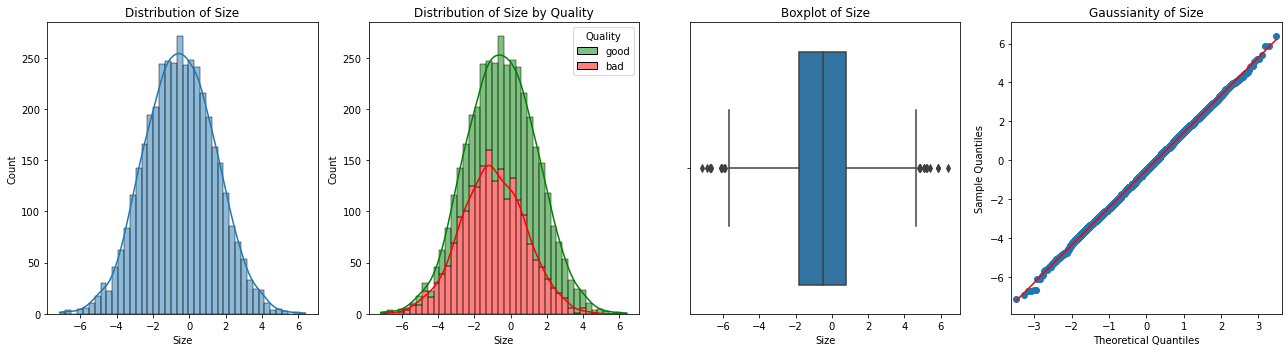

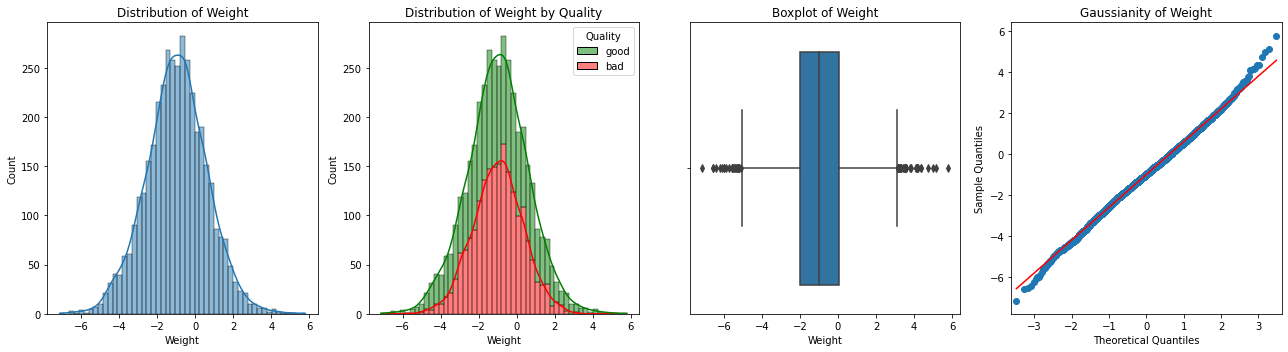

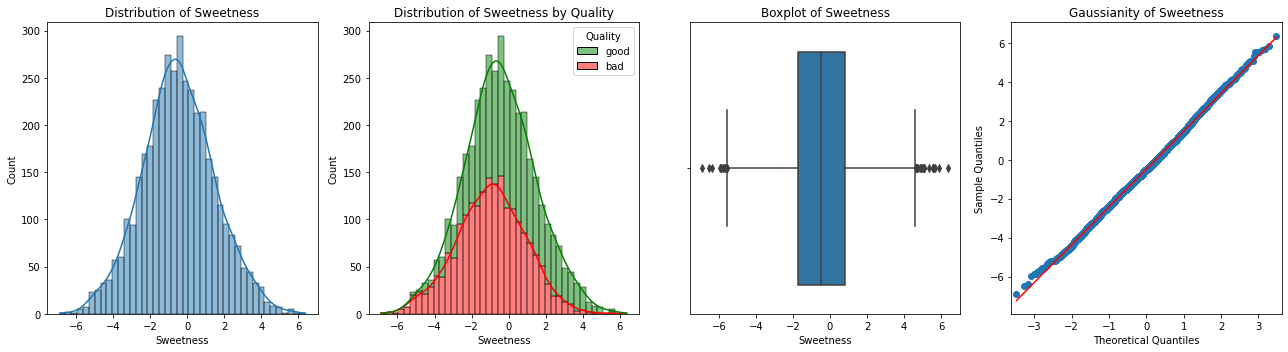

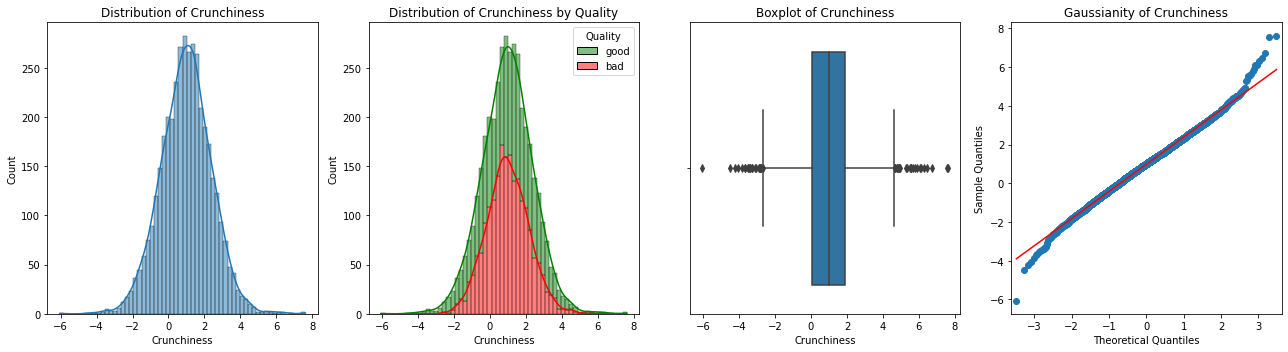

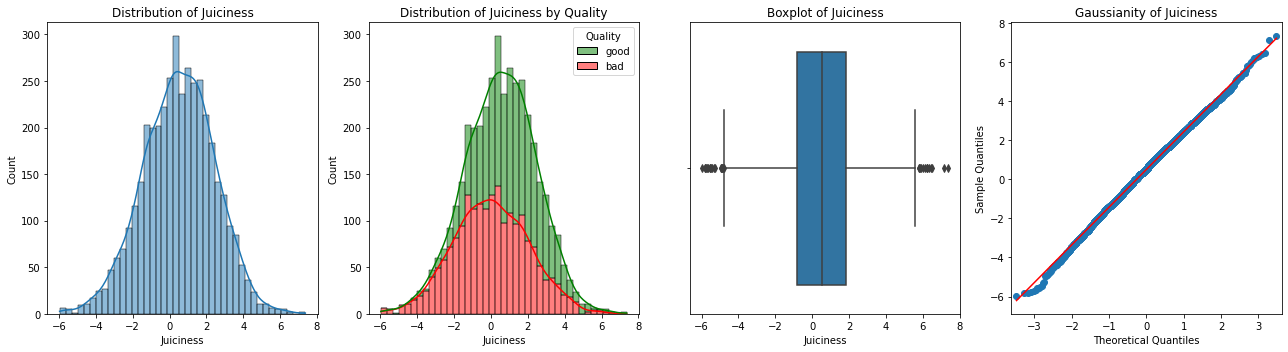

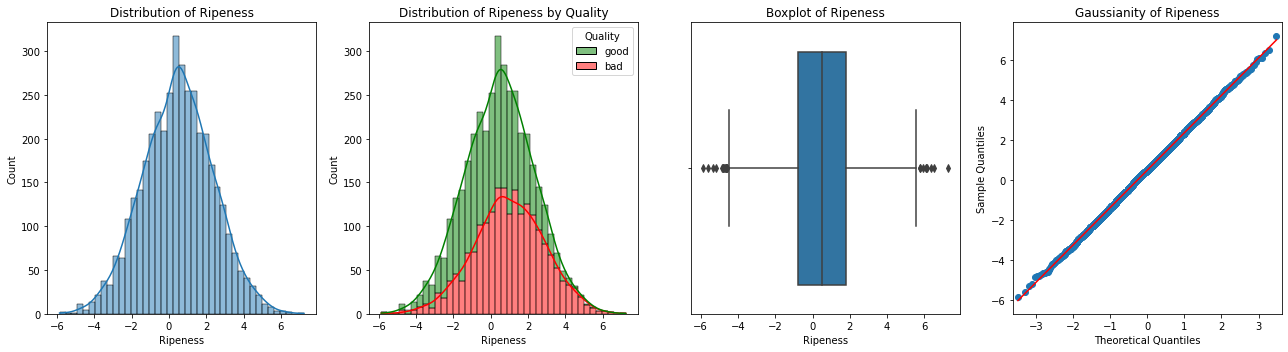

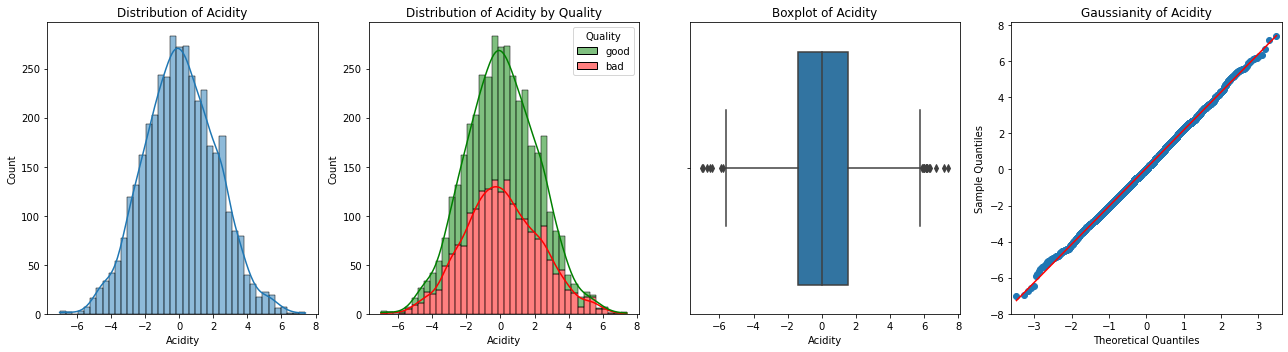

In [12]:

for feature in numerical_columns:
    fig, axes = plt.subplots(1, 4, figsize=(18, 5))

    sns.histplot(data=data, x=feature, kde=True, ax=axes[0])
    axes[0].set_title(f"Distribution of {feature}")
    
    sns.histplot(data=data, x=feature, kde=True, hue='Quality', multiple='stack', palette={'good': 'green', 'bad': 'red'}, ax=axes[1])
    # sns.histplot(data=data, x=feature, kde=True, hue='Quality', palette={'good': 'green', 'bad': 'red'}, ax=axes[1])
    axes[1].set_title(f"Distribution of {feature} by Quality")
    
    axes[2].set_title(f"Boxplot of {feature}")
    sns.boxplot(data=data, x=feature, ax=axes[2])

    qqplot(data=data[feature], line='s', ax=axes[3])
    axes[3].set_title(f"Gaussianity of {feature}")

    plt.tight_layout()
    plt.show()


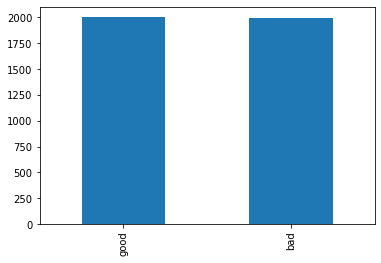

In [13]:
quality_counts = data['Quality'].value_counts()
quality_counts.plot(kind='bar')
plt.show()

In [14]:
from sklearn.model_selection import train_test_split

training_data, testing_data = train_test_split(data, test_size=0.2, random_state=42, stratify=data['Quality'])

In [15]:
from decision_tree_pure_py import build_tree

tree = build_tree(training_data.to_numpy(), header=data.columns)

Building tree... (len(rows) = 3200
Building true branch with 2140 rows...
Building tree... (len(rows) = 2140
Building true branch with 548 rows...
Building tree... (len(rows) = 548
Building true branch with 107 rows...
Building tree... (len(rows) = 107
Building true branch with 85 rows...
Building tree... (len(rows) = 85
Building true branch with 1 rows...
Building tree... (len(rows) = 1
Leaf node reached with 1 rows.
Building false branch with 84 rows...
Building tree... (len(rows) = 84
Building true branch with 83 rows...
Building tree... (len(rows) = 83
Building true branch with 74 rows...
Building tree... (len(rows) = 74
Building true branch with 71 rows...
Building tree... (len(rows) = 71
Leaf node reached with 71 rows.
Building false branch with 3 rows...
Building tree... (len(rows) = 3
Building true branch with 1 rows...
Building tree... (len(rows) = 1
Leaf node reached with 1 rows.
Building false branch with 2 rows...
Building tree... (len(rows) = 2
Leaf node reached with 2 row

In [22]:
from decision_tree_pure_py import print_predictions, classify
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


def get_classification_metrics(features, targets, tree):
    predicted_labels = []
    actual_labels = []

    for feature_row, actual_label in zip(features, targets):
        predicted_label = classify(feature_row, tree)
        predicted_labels.append(max(predicted_label, key=predicted_label.get))
        actual_labels.append(actual_label)

    accuracy = accuracy_score(actual_labels, predicted_labels)
    precision = precision_score(actual_labels, predicted_labels, average='weighted')
    recall = recall_score(actual_labels, predicted_labels, average='weighted')
    f1 = f1_score(actual_labels, predicted_labels, average='weighted')

    return accuracy, precision, recall, f1
    
    
def get_accuracy(features, targets, tree):
    correct_predictions = 0
    total_predictions = 0

    for feature_row, actual_label in zip(features, targets):
        
        predicted_label = classify(feature_row, tree)
        
        if actual_label == max(predicted_label, key=predicted_label.get):
            correct_predictions += 1
        
        total_predictions += 1

    accuracy = correct_predictions / total_predictions
    return accuracy
    

### Training Accuracy

In [18]:
get_accuracy(training_data.drop(columns=['Quality']).to_numpy(), training_data['Quality'].to_numpy(), tree)

1.0

### Testing Accuracy

In [19]:
get_accuracy(testing_data.drop(columns=['Quality']).to_numpy(), testing_data['Quality'].to_numpy(), tree)

0.78

### Classification metrics

In [20]:
get_classification_metrics(training_data.drop(columns=['Quality']).to_numpy(), training_data['Quality'].to_numpy(), tree)

(1.0, 1.0, 1.0, 1.0)

In [21]:
get_classification_metrics(testing_data.drop(columns=['Quality']).to_numpy(), testing_data['Quality'].to_numpy(), tree) 

(0.78, 0.7800042502390759, 0.78, 0.7799972499312483)

- Accuracy: 0.78 -> approximately 78% of the predictions are correct overall.

- Precision: 0.78 -> around 78.0% of the instances predicted as positive are indeed positive.

- Recall: 0.78 -> model is able to capture approximately 78.0% of the actual positive instances.

- F1 Score: 0.78 ->  there is a balance between precision and recall.



In [98]:
from decision_tree_pure_py import print_tree
print_tree(tree)

Is Juiciness >= -0.315445298?
--> True:
  Is Ripeness >= 1.614354627?
  --> True:
    Is Sweetness >= 0.630764366?
    --> True:
      Is Size >= -2.379439903?
      --> True:
        Is Ripeness >= 3.726932143?
        --> True:
          Predict: {'bad': 1}
        --> False:
          Is Acidity >= -2.208685041?
          --> True:
            Is Size >= -1.259381194?
            --> True:
              Is Acidity >= -1.71883793?
              --> True:
                Predict: {'good': 71}
              --> False:
                Is Size >= 0.610132436?
                --> True:
                  Predict: {'bad': 1}
                --> False:
                  Predict: {'good': 2}
            --> False:
              Is Size >= -1.339886975?
              --> True:
                Predict: {'bad': 2}
              --> False:
                Predict: {'good': 7}
          --> False:
            Predict: {'bad': 1}
      --> False:
        Predict: {'bad': 22}
    --> False:
      Is